# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [77]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
from panel.interact import interact
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')

In [78]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [79]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [80]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_housing_average = sfo_data.groupby('year').mean()
sfo_housing_average.head()

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560,1239
2011,341.903429,374507,1530
2012,399.389968,376454,2324
2013,483.600304,378401,2971
2014,556.277273,380348,3528


In [81]:
# Save the dataframe as a csv file
sfo_housing_average.to_csv("./Data/sfo_housing_average.csv")

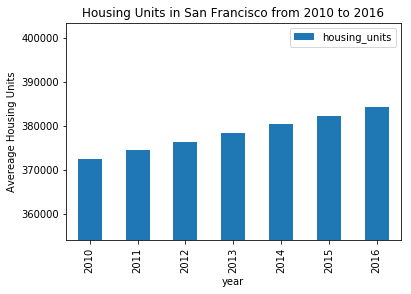

In [82]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
sfo_housing_stat = sfo_housing_average['housing_units'].describe()
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
sfo_housing_average.plot(y='housing_units',kind='bar', title='Housing Units in San Francisco from 2010 to 2016',ylim = [sfo_housing_stat[3]*0.95,sfo_housing_stat[7]*1.05], ylabel= 'Avereage Housing Units')

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [83]:
sfo_sale_average_sqft_rent = sfo_data[['sale_price_sqr_foot','gross_rent']].groupby('year').mean()

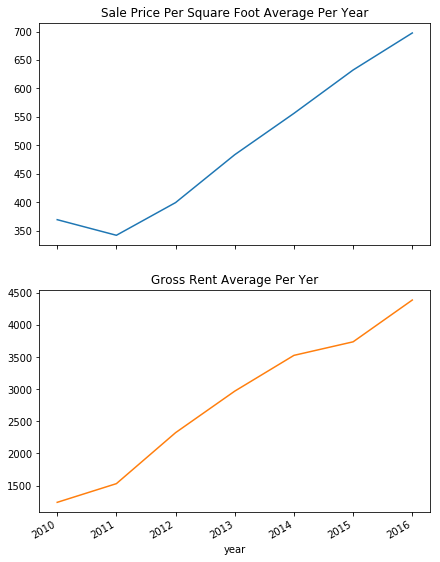

In [84]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent
plots = sfo_sale_average_sqft_rent.plot(subplots=True,kind='line',title=['Sale Price Per Square Foot Average Per Year', 'Gross Rent Average Per Yer'], figsize=(7,10),legend=False)


- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [85]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sfo_housing_average_neighborhood = sfo_data.groupby(['year','neighborhood']).mean().reset_index()
neighborhood_list = sfo_housing_average_neighborhood['neighborhood'].tolist()
sfo_housing_average_neighborhood.head(20)
#sfo_housing_average_neighborhood.loc[sfo_housing_average_neighborhood['neighborhood'] == x]

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [86]:
# Render plot with Panel interactive widget
#Create a function that generates an hv plot based on an 
def plot_gross_rent(neighborhood):
    file_path = Path("Data/sfo_neighborhoods_census_data.csv")
    sfo_data = pd.read_csv(file_path, index_col="year")
    gross_rent_data_all = sfo_data.groupby(['year','neighborhood']).mean().reset_index()
    gross_rent_data = gross_rent_data_all.loc[gross_rent_data_all['neighborhood'] == neighborhood]
    return gross_rent_data.hvplot(x='year', y='gross_rent', title = 'Gross Rent Average Per Year')
#plot = sfo_housing_average_neighborhood.hvplot(x='year',y='gross_rent')
interact(plot_gross_rent, neighborhood = sfo_housing_average_neighborhood['neighborhood'].tolist())

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive11116')

In [87]:
# Use hvplot to create an interactive line chart of the average monthly rent.
def plot_sale_price(neighborhood):
    file_path = Path("Data/sfo_neighborhoods_census_data.csv")
    sfo_data = pd.read_csv(file_path, index_col="year")
    sale_price_data_all = sfo_data.groupby(['year','neighborhood']).mean().reset_index()
    sale_price_data = sale_price_data_all.loc[sale_price_data_all['neighborhood'] == neighborhood]
    return sale_price_data.hvplot(x='year', y='sale_price_sqr_foot', title = 'Sale Price / SQ Foot Average Per Year')
interact(plot_sale_price, neighborhood = sfo_housing_average_neighborhood['neighborhood'].tolist())

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive11301')

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [88]:
# Getting the data from the top 10 expensive neighborhoods to own
top_10_neighborhoods_raw = sfo_data.groupby(['neighborhood']).mean().reset_index()
top_10_neighborhoods_sorted = top_10_neighborhoods_raw.sort_values(by ='sale_price_sqr_foot', ascending=False)
top_10_neighborhoods_sorted[0:9].head(10)


,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
65,Union Square District,903.993258,377427.50,2555.166667
36,Merced Heights,788.844818,380348.00,3414.000000
38,Miraloma Park,779.810842,375967.25,2155.250000
51,Pacific Heights,689.555817,378401.00,2817.285714
71,Westwood Park,687.087575,382295.00,3959.000000
63,Telegraph Hill,676.506578,378401.00,2817.285714
57,Presidio Heights,675.350212,378401.00,2817.285714
10,Cow Hollow,665.964042,378401.00,2817.285714
56,Potrero Hill,662.013613,378401.00,2817.285714


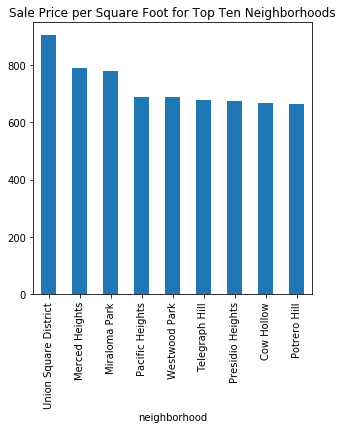

In [89]:
# Plotting the data from the top 10 expensive neighborhoods
plot = top_10_neighborhoods_sorted[0:9].plot.bar(x='neighborhood', y='sale_price_sqr_foot', title='Sale Price per Square Foot for Top Ten Neighborhoods', figsize=(5,5),legend=False)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [57]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
sfo_housing_average_neighborhood.head()


,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [72]:
# Plotting the data from the top 10 expensive neighborhoods
sfo_housing_average_neighborhood.hvplot(x='year', y=['gross_rent','sale_price_sqr_foot'],kind = 'bar', groupby='neighborhood', rot=90, height=500, xlabel='Year', ylabel='Dollar Amount')

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [99]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
sfo_data_loc = pd.read_csv(file_path)
sfo_data_loc.head()

,neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [100]:
# Calculate the mean values for each neighborhood
calc_averages_neighborhood = sfo_data.groupby('neighborhood').mean().reset_index()
calc_averages_neighborhood.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [102]:
# Join the average values with the neighborhood locations
final = pd.concat([sfo_data_loc, calc_averages_neighborhood], axis="columns", join="inner")
#drop duplicate neighborhood column
final = final.loc[:,~final.columns.duplicated()]
final.head()

,neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,576.746488,379374.5,3080.333333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

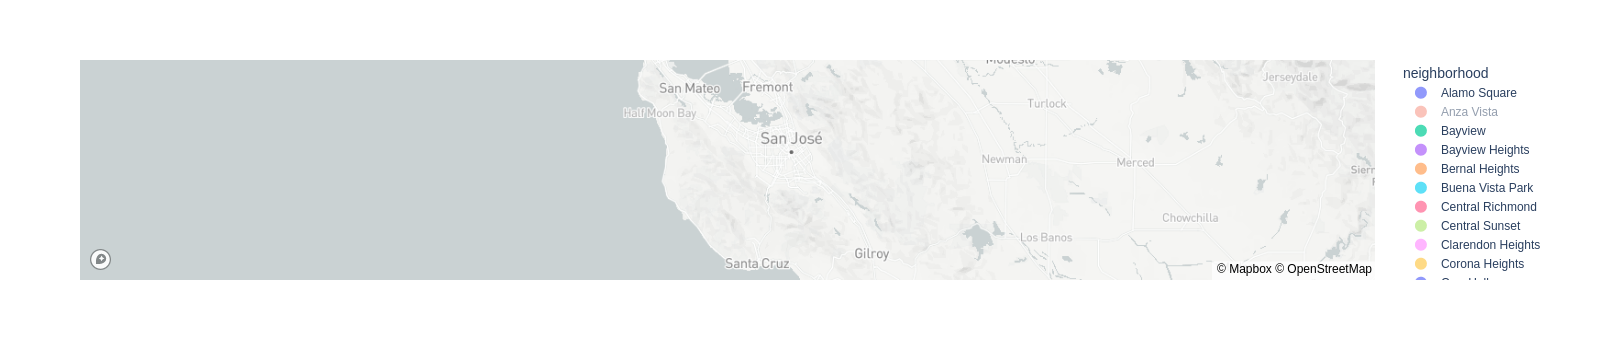

In [108]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_plot = px.scatter_mapbox(
    final,
    lat="Lat",
    lon="Lon",
    size="gross_rent",
    color="neighborhood")

map_plot.show()

- - -